# Support Vector Machines

#### finding dot product of vector

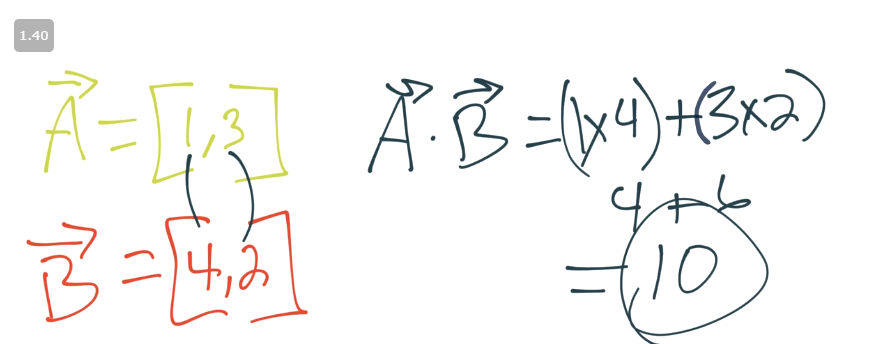

#### finding magnitude of a vector

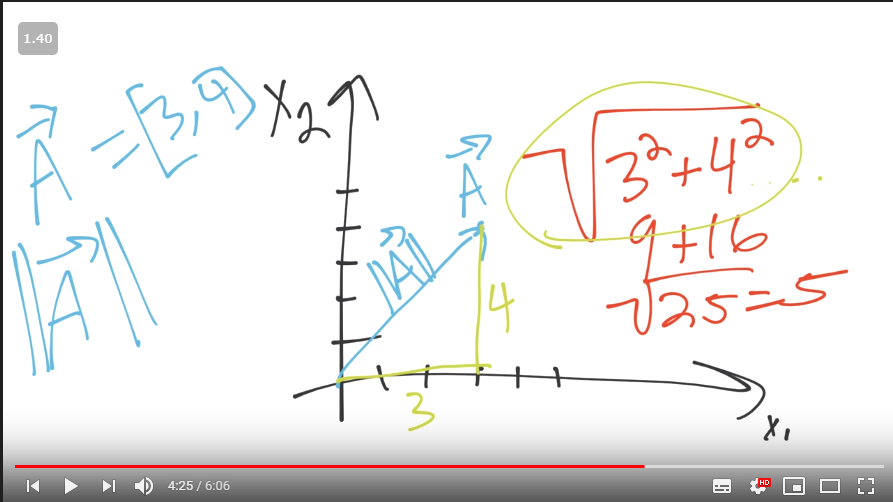

Magnitude of the vector can be calculated with eucledian distance

#### Matrix Transpose

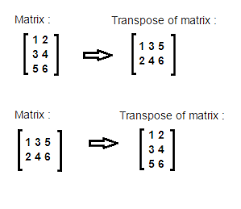

#### Difference betwen these two

y = wx + b

y = w^Tx + b

In the first equation w and x  are both constants and real numbers. Commutative property of multiplication is satisfied when multiplying w and x together. In other words, the order in which w and x are multiplied doesnt matter.

In the second equation, note the distinction x and W^T are not like w and x which are just scalar values. Crucially commutative property of (matrix) multiplication is not always satified in the world of linear algebra.

W^Tx != xW^T


### Support Vector Machines

https://towardsdatascience.com/understanding-support-vector-machine-part-1-lagrange-multipliers-5c24a52ffc5e

Capable of performing Linear, Non-Linear classification, Regression and Outlier detection. Well suited for complex but small to medium sized datasets.

We call SVM classifier *"Large Margin Classifier"* because it fits hyperplane with widest possible margin between positive and negative points to avoid overfitting.

SVM is sensitive to scales, StandardScaler library is used to scale the data.

If we have different hyperplanes the best choice will be the hyperplane that leaves maximum margin from both the classes. 

SVM is fully supported by the instances located on the edge of the margins. These instances are called **"Support Vectors"**. They are the most important data points because they define the hyperplane. They specify decision function. If support vectors are removed form the dataset, it wil potentially change the position of the dividing line (Hyperplane in case of dimensions higher than 2D). 

**Hard Margin Classification:** Requires all data points to be correctly classified. There are two main issues with hard classification. 

1) Only works if data is linearly separable

2) Sensitive to outliers 

If training data is noisy model will be overfitting - Solution is to use powerful kernels.

### Soft Margin Classification

It allows instances to end up on the margin or even on wrong side. But the main objective is to keep the distance margin (margin) as wide as possible. Thus it reduces the overfittting and generalizes the new data very well.


soft margin SVMs are used to reduce the effects of outliers and mislabeled examples.

If dataset is not linearly separable even in higher dimensions, use use soft margin classification.

That allows model to make few mistakes (misclassifications). Then we pay cost for each misclassified example. Cost for misclassification depends on how far it is from meeting marginal requirements. 

To implement this we introduce *Slack Variable* ξ, a non-zero value allow x_i to not meet the requirement at a cost proportional to value of ξ_i. We can define slack variable as a value that indicates how much we must move our point so that it is correctly and confidently classified.  We should also penalize our objective function whenever we use slack variables, otherwise we can just set the slack variables to extremely high values and solve the optimization problem, but obtain a terrible solution to it.

This is where the variable C comes from - it is a hyperparameter that controls how much we penalize our use of slack variables. If we let C→0 then we don’t penalize slack variables at all, and as we increase C , we penalize our slack variables more and more - it’s essentially a tradeoff between penalizing slack variables and obtaining a large margin for our SVM.


**Cost of Slack Variable**: Whenever the point is on the wrong side of the marginal hyperplane, we quantify the amount of error by the ratio of ξ and half the margin. slack variables are non negative values.

### Scikit-learn implementation of SVM

Scikit learn has 3 different classes for performing Multiclass classification on the dataset.

1.SVC

2.NuSVC

3.Linear SVC

linearSVC doesnt accept the keyword "kernel", it assumed to be linear. 

linearSVC implements one-vs-rest multiclass strategy, thus training N models for N no. of classes.

SVC and NuSVC implements one-vs-one approach for multiclass classification. If there are N no. of classes, then N*(N-1)/2 classifiers are constructed and each one trains data from two classes.

As for Regression, there are 3 different implementation of Support Vector Regression. 

1.SVR 

2.NuSVR 

3.linearSVR

limearSVR provides faster implementation than SVR but only considers linear kernels.

### C in SVM

In Support Vector Machine we always look for 2 things:

*Setting a larger margin*

*Lowering misclassification rate*

Lower misclassifications on the train set doesnt mean lower misclassifications on the test/validation set. To get a better result in the testing data, SVM looks for a higher margin.

Larger value of the C ==> small margin; fewer violations

Smaller Value of the C ==> wider margin; more violations

**How to choose value of C?**

try bunch of different values and choose the value which gives you lowest misclassification rate on testing data. Use GridsearchCV, in which you can directly give a list of different values parameter and it will tell you which value is best.

If SVM model is overfitting, we can regularize it by reducing the C.

-------------------------------------------------------------------------------

In linear kernel, you just need to optimize the C parameter. This can be done using line search on a pre-defined range, let's say that you seek your optimal C in a range of values 2^(-10), 2^(-9), ..., 2^0, ..., 2^9, 2^10.

If you choose to use the RBF kernel, then you need to (jointly) optimize another parameter, namely the gamma parameter, which refers to the variance of the corresponding Gaussian bell around support vectors. In this case you need to use grid search. In any case, you need to perform cross-validation, e.g., 3-Fold, 10-Fold, etc. 



In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [3]:
iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # petal length and petal width
y = (iris["target"] == 2).astype(np.float64) # iris-virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])

svm_clf.fit(X,y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

Python's SVM implementation uses one-versus-one, for each pairwise comparision we measure the decision function. 

Decision function is regular SVM boundary, It tells us which side of the hyperplane generated by the classifier our datapoint falls (and how far we are away from it). 

based on that information, the estimator (predict() function) labels the example with corrsponding label.


When you call decision_function(), you get the output from each of the pairwise classifiers (n*(n-1)/2 numbers total). See pages 127 and 128 of "Support Vector Machines for Pattern Classification".

In [4]:
# predict function outputs the lable
"""
clf.predict([predict_this])

['A']

# decision function outputs the distance from hyperplane
clf.decision_function([predict_this])

[[ 185.23220833   43.62763596  180.83305074  -93.58628288   62.51448055  173.43335293]]

"""

"\nclf.predict([predict_this])\n\n['A']\n\n# decision function outputs the distance from hyperplane\nclf.decision_function([predict_this])\n\n[[ 185.23220833   43.62763596  180.83305074  -93.58628288   62.51448055  173.43335293]]\n\n"

### Non-Linear SVM Classification

One approach to handle nonlinear datasets is to add more features, such as polynomial features x2 = (x1)^2, This results in linearly separable dataset.

Ex: converting 1D data to 2D data and fit linear line to separate the data.

In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles

Xs, ys = make_circles(90, factor=0.2, noise=0.1)
# noise = standard deviation of Gaussian noise added in data.
# factor = scale factor between the two circles

plt.scatter(Xs[:,0], Xs[:,1], c=ys, s=50, cmap='seismic')

You can see here that It is impossible to draw a line in this 2D plot. When we dont have linear separable data the kernel trick comes handy. The idea is mapping the non-linear separable dataset into higher dimension space where we can find a hyperplane that can separate the samples.

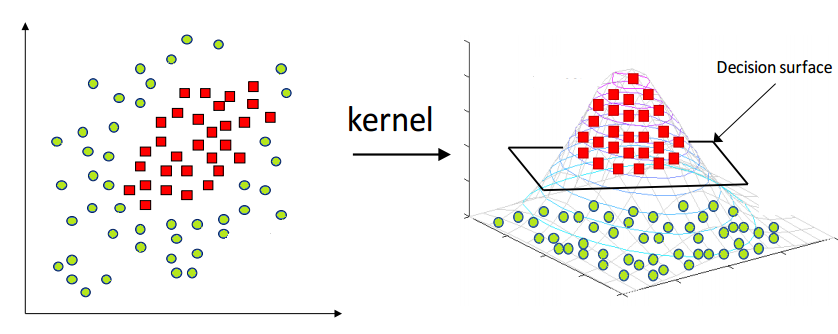

if we find a way to map the data from 2-dimensional space to 3-dimensional space, we will be able to find a decision surface that clearly divides between different classes. 

first step of this data transformation process is to map all the data point to a higher dimension (in this case, 3 dimension), find the boundary, and make the classification.

https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d

https://prateekvjoshi.com/2012/09/01/kernel-functions-for-machine-learning/

### Kernel Trick    

https://www.quora.com/What-are-kernels-in-machine-learning-and-SVM-and-why-do-we-need-them/answer/Lili-Jiang?srid=oOgT

When we are dealing with data that is non linear, we transform the data into higher dimension to find the decision function that clearly divides the data.

Kernel is a shortcut that helps us to do certain calculation faster which otherwise would involve computations in higher dimensional space.

When there are more and more dimensions, computations within that space becomes more and more expensive. This is when kernel trick comes in. **It allows us to operate in original feature space without computing the coordinates of the data in higher dimensional space.**

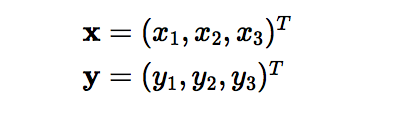

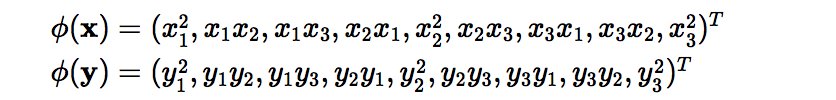

if we want to map these X and Y points from 3D to 9-dimensional space we do it like this. It is computationally expensive.

**If we use the kernel function, instead of doing the complicated calculations in 9-dimensional space, we reach the same result within the 3-dimensional space by calculating the dot product of x-transpose and y. It is computationally very cheap**


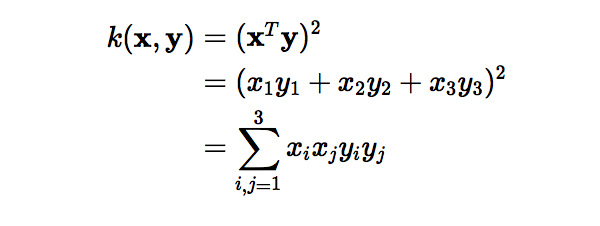

### Types of Kernal Tricks

There are different types of kernel tricks, but popular ones are

**Polynomial Kernel**

**Radial Bias Function (RBF) Kernel**

### Polynomial Kernel

Adding polynomial features is simple to implement and works with all sorts of algorithms.

Low polynomial degree --> cannot deal with complex datasets.

High polynomial degree --> huge no. of features, makes model slow.

Kernel Trick makes it possible to get the same result as if you added many polynomial features, even with very high degree polynomials, without actually having to add them.

In [7]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

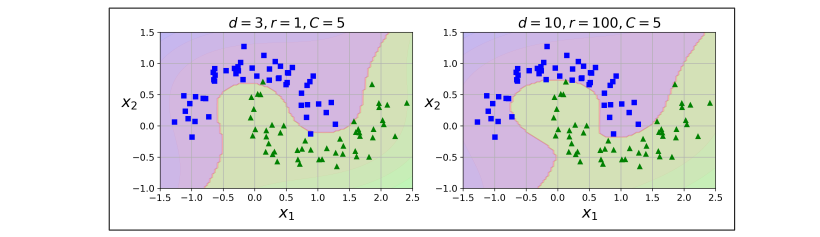

Overfitting --> reduce the polynomial degree.

Underfitting --> Increase the polynomial degree.

A common approach to find the right hyperparameter values is to use GridSearch. It is often faster to first do a very coarse grid search, then finer grid search around the best values found. 

### Differences between 'LinearSVC' and 'SVC'

By default scaling, LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss. It is possible to manually define a 'hinge' string for loss parameter in LinearSVC.

LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction. 

Also, for multi-class classification problem SVC fits N * (N - 1) / 2 models where N is the amount of classes. LinearSVC, by contrast, simply fits N models.

If the classification problem is binary, then only one model is fit in both scenarios. multi_class and decision_function_shape parameters have nothing in common. The second one is an aggregator that transforms the results of the decision function in a convenient shape of (n_features, n_samples). multi_class is an algorithmic approach to establish a solution.

The underlying estimators for LinearSVC are liblinear, that do in fact penalize the intercept. SVC uses libsvm estimators that do not. 

liblinear estimators are optimized for a linear (special) case and thus converge faster on big amounts of data than libsvm. That is why LinearSVC takes less time to solve the problem.

In fact, LinearSVC is not actually linear after the intercept scaling as it was stated in the comments section.

### Gaussian RBF Kernel

In [8]:
# Gaussian RBF kernel with SVC class

rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

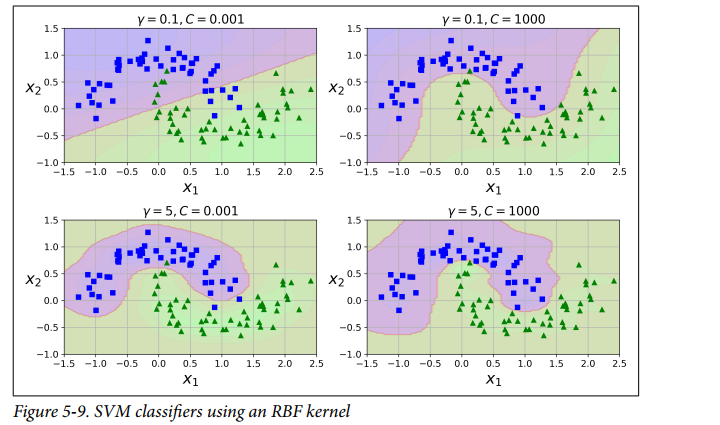


Parameter C controls the width of the margin. Whereas parameter gamma controls the peak of the gaussian curve.

**Increasing gamma:**

- Makes bell shaped curve narrower.

- Decision boundary ends up being more irregular, wiggling around individual instances.

**Decreasing Gamma:**

- small gamma values makes the bell shaped curves wider.

- Decision boundary ends up smoother.

### How to choose Kernel

Always try the linear kernel first. ( LinearSVC is much faster than SVC(kernel='linear') becaseu linear kernel uses one-vs-rest strategy), especially if the training set is very large or if it has plenty of features. 

If the training set is not too large you should try Gaussian RBF kernel. 

### Computational Complexity

LinearSVC class is based on 'liblinear' library, which implements an optimized algorithm for linear SVMs. It does not support kernel trick, but it scales almost linearly with the training instances and number of features. 

Its training time complexity is O(m * n)

------------------------------------------------------------------------------

SVC class is based on 'libsvm' library, which implements an algorithm that supports the kernel trick. 

Training complexity between O(m2 × n) and O(m3 × n)

That means it gets dreadfully slow when number of training instances gets large.

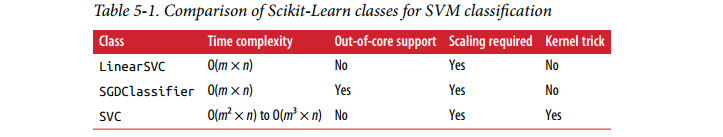

### Parameters for SVC

In [9]:
from sklearn import svm
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

def plotSVC(title):
    # create a mesh to plot in
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    plt.subplot(1,1,1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()    

**Kernel**

kernel parameters selects the type of hyperplane used to separate the data. 'linear' will use linear hyperplane (a line in 2D), 'rbf' and 'poly' uses not linear hyperplane.

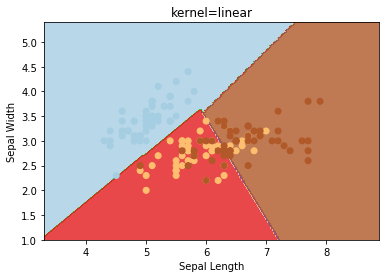

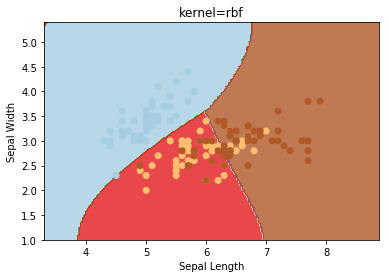

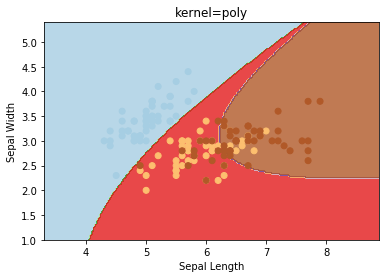

In [10]:
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    svc = svm.SVC(kernel=kernel).fit(X,y)
    plotSVC('kernel='+str(kernel))

**Gamma:**

Gamma is a parameter for non linear hyperplanes (rbf and poly).  The higher the gamma value it tries to exactly fit the training data.

Increasing gamma leads to overfitting as the classifier tries to perfectly fit the training data.

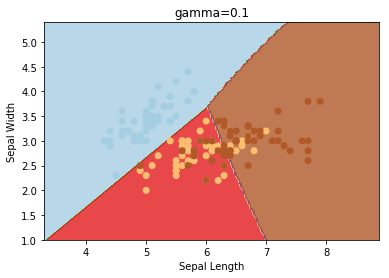

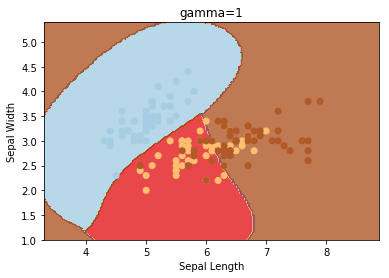

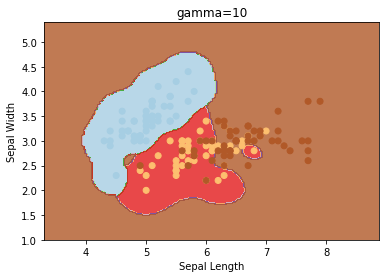

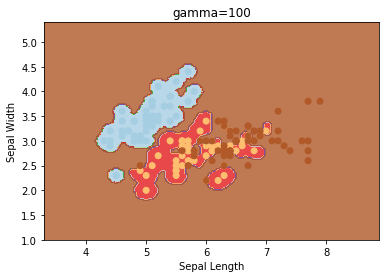

In [11]:
gammas = [0.1, 1, 10, 100]

for gamma in gammas:
   svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
   plotSVC('gamma='  + str(gamma))

### C

C is the penalty parameter of the error term. It controls the tradeoff between smooth decision boundary and classifying the training points correctly.

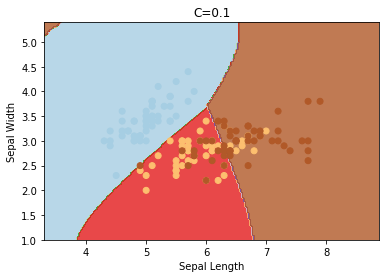

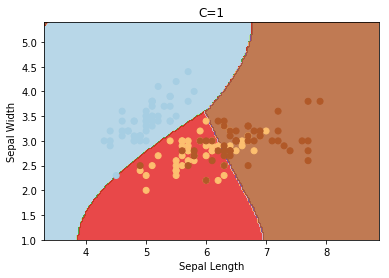

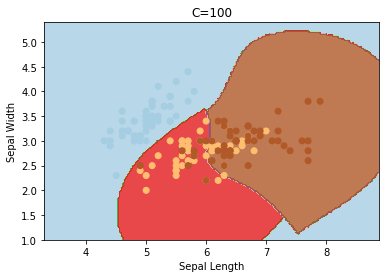

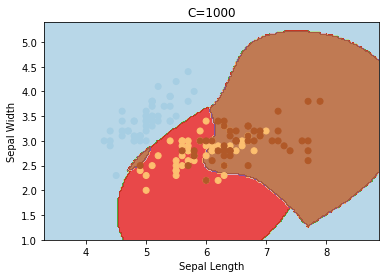

In [12]:
cs = [0.1, 1, 100, 1000]

for c in cs:
    svc = svm.SVC(kernel='rbf', C=c).fit(X,y)
    plotSVC('C=' + str(c))

### degree

Degree is a parameter used when the kernel is set to 'poly'. It select the degree of polynomial.

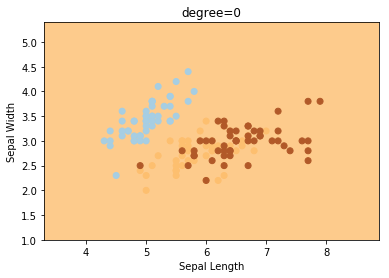

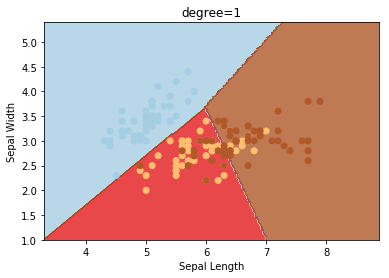

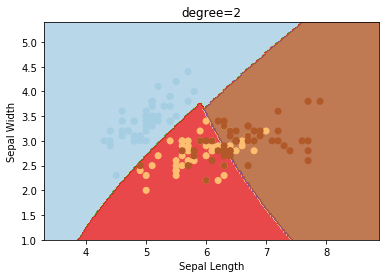

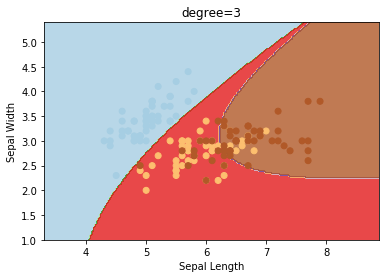

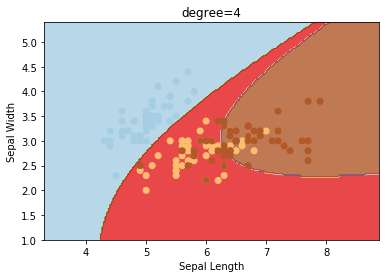

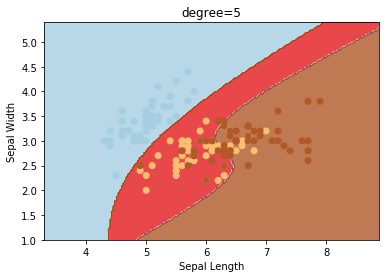

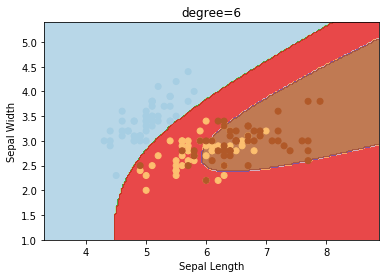

In [13]:
degrees = [0,1,2,3,4,5,6]

for degree in degrees:
    svc = svm.SVC(kernel='poly', degree=degree).fit(X,y)
    plotSVC('degree=' + str(degree))

## Differences between poly and RBF kernel

poly, RBF and linear are kernel functions. Kernel functions  are used to map original dataset to higher dimensional space with view of making it linear dataset.

Usually linear and polynomial kernels are less time consuming and provides less accuracy than the RBF kernel.

Dont use RBF kernel for text classification, it takes weeks to run, instead use linearSVC

## Differences between C and Gamma

**C**

C is used in Soft Margin Classification.

C parameter determines the width of the margin, 

It determines how many data samples are allowed to be placed in different class.

It controls how much we penalize our use of slack variables. If we let C→0 then we don’t penalize slack variables at all, and as we increase C , we penalize our slack variables more and more - it’s essentially a tradeoff between penalizing slack variables and obtaining a large margin for our SVM

**Gamma**

Gamma is the parameter of  Gaussian Kernel (to handle non-linear classification). 

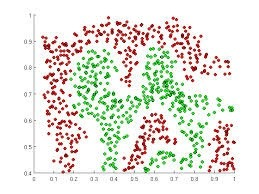

These points are non linearly separable in 2D so you want to transform them to higher dimension where they will be linearly separable. Imagine 'raising' the green points. Then you can separate them from the red points with a plane (hyperplane).

to 'raise' points you use RBF kernel, gamma controls the shape of the 'peaks' where you raise the points. A small gamma gives you a pointed bump in the higher dimension. A large gamma gives you a softer and broader bump.

#### C vs Gamma

**large C gives you low bias and high variance.** 

Low bias because margin is narrow, fewer misclassification. High variance because when C is low it is narrow and try to fit the data very well and causes overfitting. 

**Smaller C gives higher bias and low variance**

wider curve and more misclassification. but it is recommended. because we need model that perfroms well on new data rather than training data.

**Small gamma gives low bias and high variance**

A small gamma gives you a pointed bump in the higher dimension. A large gamma gives you a softer and broader bump.

**Large gamma gives higher bias and low variance**


## SVM Regression

SVM also supports linear and non-linear regression.

The trick is to reverse the objective: instead of trying to fit the largest possible margin between two classes while limiting margin violations, *SVM Regression tries to fit as many instances as possible on the margin while limiting margin violations (i.e., instances off the margin)*. The width of the street is controlled by a hyperparameter ϵ. 


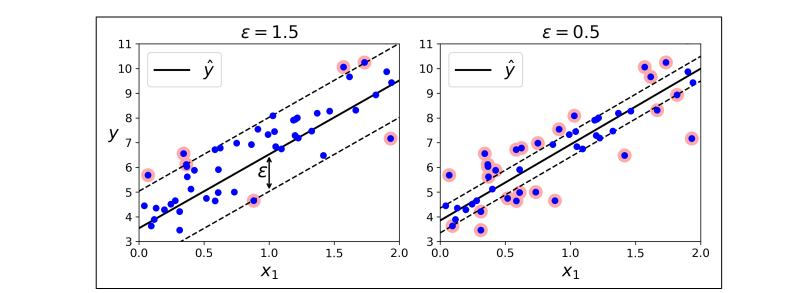

**What is the main difference between SVR and a simple regression model?**

In simple regression we try to minimize the error rate. While in SVR we try to fit the error within a certain threshold.

Our best fit line is hyperplane(margin) that has maximum number of points.



**Epsilon Hyperparameter** 

Epsilon hyperparameter controls the distance of margin lines from the hyper plane, the higher the epsilon wider the margin will be.


**Note:** By default the kernel is 'rbf' degree is 3 and epsilon is 0.1. Other kernels available are poly and linear.

In [14]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

### SVM for non-linear Regression

In [16]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

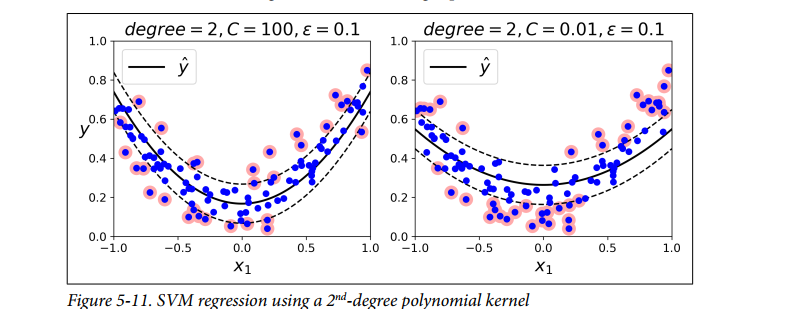

To perform non-linear regression tasks, you can use a kernelized SVM model. 

SVR supports kernel trick. SVR class is regression equivalent of SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class. 

LinearSVR class scales with size of the traing set (just like linearSVC class), while the SVR class gets too much slow when the training set grows large (just like SVC class).

**SVMs can also be used for outlier detection**

### Hinge Loss

The job of the loss function is to quantify the error between the 'Predicted y' and 'actual y'. 

Loss function defines how much you want to penalize the miss-classified observations.

So intuitively, the farther the 'predicted y' from the 'actual y' more should be penalty and vice-versa.

Given the amount of total error ( = Sum of losses of for each observation) we made in particular iteration, we try to reduce this error by adjusting the weights for next iteration. This continues till we can no longer can minimize the Total Error or Cost.

**Total Error or Cost = Sum of losses for each observation in that iteration**


final weights which we arrive at, at the end of the iterations forms our final model used for predicting unseen data.

for SVM loss function is **hinge loss**


An interesting charecteristics of the SVM classifiers is that, only support vectors play a role in the classifier obtained. Observations on the either side of the margin does not affect it. This is due to the fact that loss function is exactly zero for predicted_y >= 1. This corresponds to observations that are on correct side of the margin.

**Loss function is zero when**

--> predicted y >= 1 and

--> actual y and predicted y are on same class

But when actual y and predicted y have opposite sign, the hinge loss increases linearly with y.

SVM, if a computed value gives a correct classification and is larger than the margin, there is no hinge loss. If a computed value gives a correct classification but is too close to zero (where too close is defined by a margin) there is a small hinge loss. If a computed value gives an incorrect classification there will always be a hinge loss.

https://jamesmccaffrey.wordpress.com/2018/10/04/hinge-loss-explained-with-a-table-instead-of-a-graph/





### Pros and Cons associated with SVM

**Pros:**

It is effective in cases where number of dimensions is greater than the number of samples.

It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

**Cons:**

It doesn’t perform well, when we have large data set because the required training time is higher

It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping

SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.